<a href="https://colab.research.google.com/github/Vinay3022272/Automated-Data-Inconsistency-Detection-Tool/blob/main/Playstore_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [85]:
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [36]:
df_copy = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df_copy
df=df_copy

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [38]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [39]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [40]:
df.columns = df.columns.str.strip()

In [41]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [64]:
no_of_mask = df["Reviews"].str.contains("M")
df = df.drop(df.index[10472]).reset_index(drop=True)
df[no_of_mask]
df.iloc[10472]

/tmp/ipython-input-3205522523.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[no_of_mask]


,10472
App,Sat-Fi Voice
Category,COMMUNICATION
Rating,3.4
Reviews,134203
Size,14000000.0
Installs,"1,000+"
Type,Free
Price,0
Content Rating,Everyone
Genres,Communication


In [58]:
df["Reviews"]=df_copy["Reviews"]

In [65]:
df["Reviews"].isnull().sum()
# df["Reviews"]=df["Reviews"].str.replace("M","",regex=False)
df["Reviews"]=df["Reviews"].astype(int)

In [59]:
import pandas as pd
import numpy as np

def clean_size(x):
    x = str(x)
    if 'M' in x:
        # Remove M, convert to float, multiply by 1 million
        return float(x.replace('M', '')) * 1_000_000
    elif 'k' in x:
        # Remove k, convert to float, multiply by 1 thousand
        return float(x.replace('k', '')) * 1_000
    elif x == 'Varies with device':
        return np.nan  # Handle edge cases
    else:
        # Try returning the number as is, or 0 if it fails
        try:
            return float(x)
        except:
            return np.nan

# Apply the function to the column
df["Size"] = df["Size"].apply(clean_size)

In [56]:
# df["Size"].unique()
df["Size"]=df["Size"].str.replace("M","000k", regex=False)
df["Size"]=df["Size"].str.replace("k","000", regex=False)


In [61]:
# df["Size"].unique()

In [75]:
df["Installs"].unique()
# df["Price"].unique()

np.int64(0)

In [71]:
chars_to_remove = ["+",",","$"]
col_to_remove =["Installs","Price"]

for char in chars_to_remove:
  for col in col_to_remove:
    df[col]=df[col].str.replace(char,"")




In [77]:
df["Price"]=df["Price"].astype(float)
df["Installs"]=df["Installs"].astype(int)

In [90]:
df["Type"].unique()

array([0., 1.])

In [89]:
replce_dict = {
    "Free":0,
    "Paid":1,
    np.nan:0
}
df["Type"] = df["Type"].replace(replce_dict)

In [92]:
df["Type"] = df["Type"].astype(int)

In [96]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])
df["Last Updated"]
df["lp_day"]=df["Last Updated"].dt.day
df["lp_month"]=df["Last Updated"].dt.month
df["lp_year"]=df["Last Updated"].dt.year

In [98]:
df.drop("Last Updated", axis=1, inplace=True)

In [102]:
# df.to_csv("Play_Store_Cleaned_Data.csv")
df.to_csv("sample_data/Play_Store_Cleaned_Data.csv")

In [108]:
df[df.duplicated("App")].shape

(0, 15)

In [107]:
df.drop_duplicates(subset=["App"], keep="first", inplace=True)

In [112]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print(f"we have {len(numeric_features)} numeric features: {numeric_features}")

we have 9 numeric features: ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'lp_day', 'lp_month', 'lp_year']


In [118]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
print(f"we have {len(categorical_features)} categorical features: {categorical_features}")

we have 6 categorical features: ['App', 'Category', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


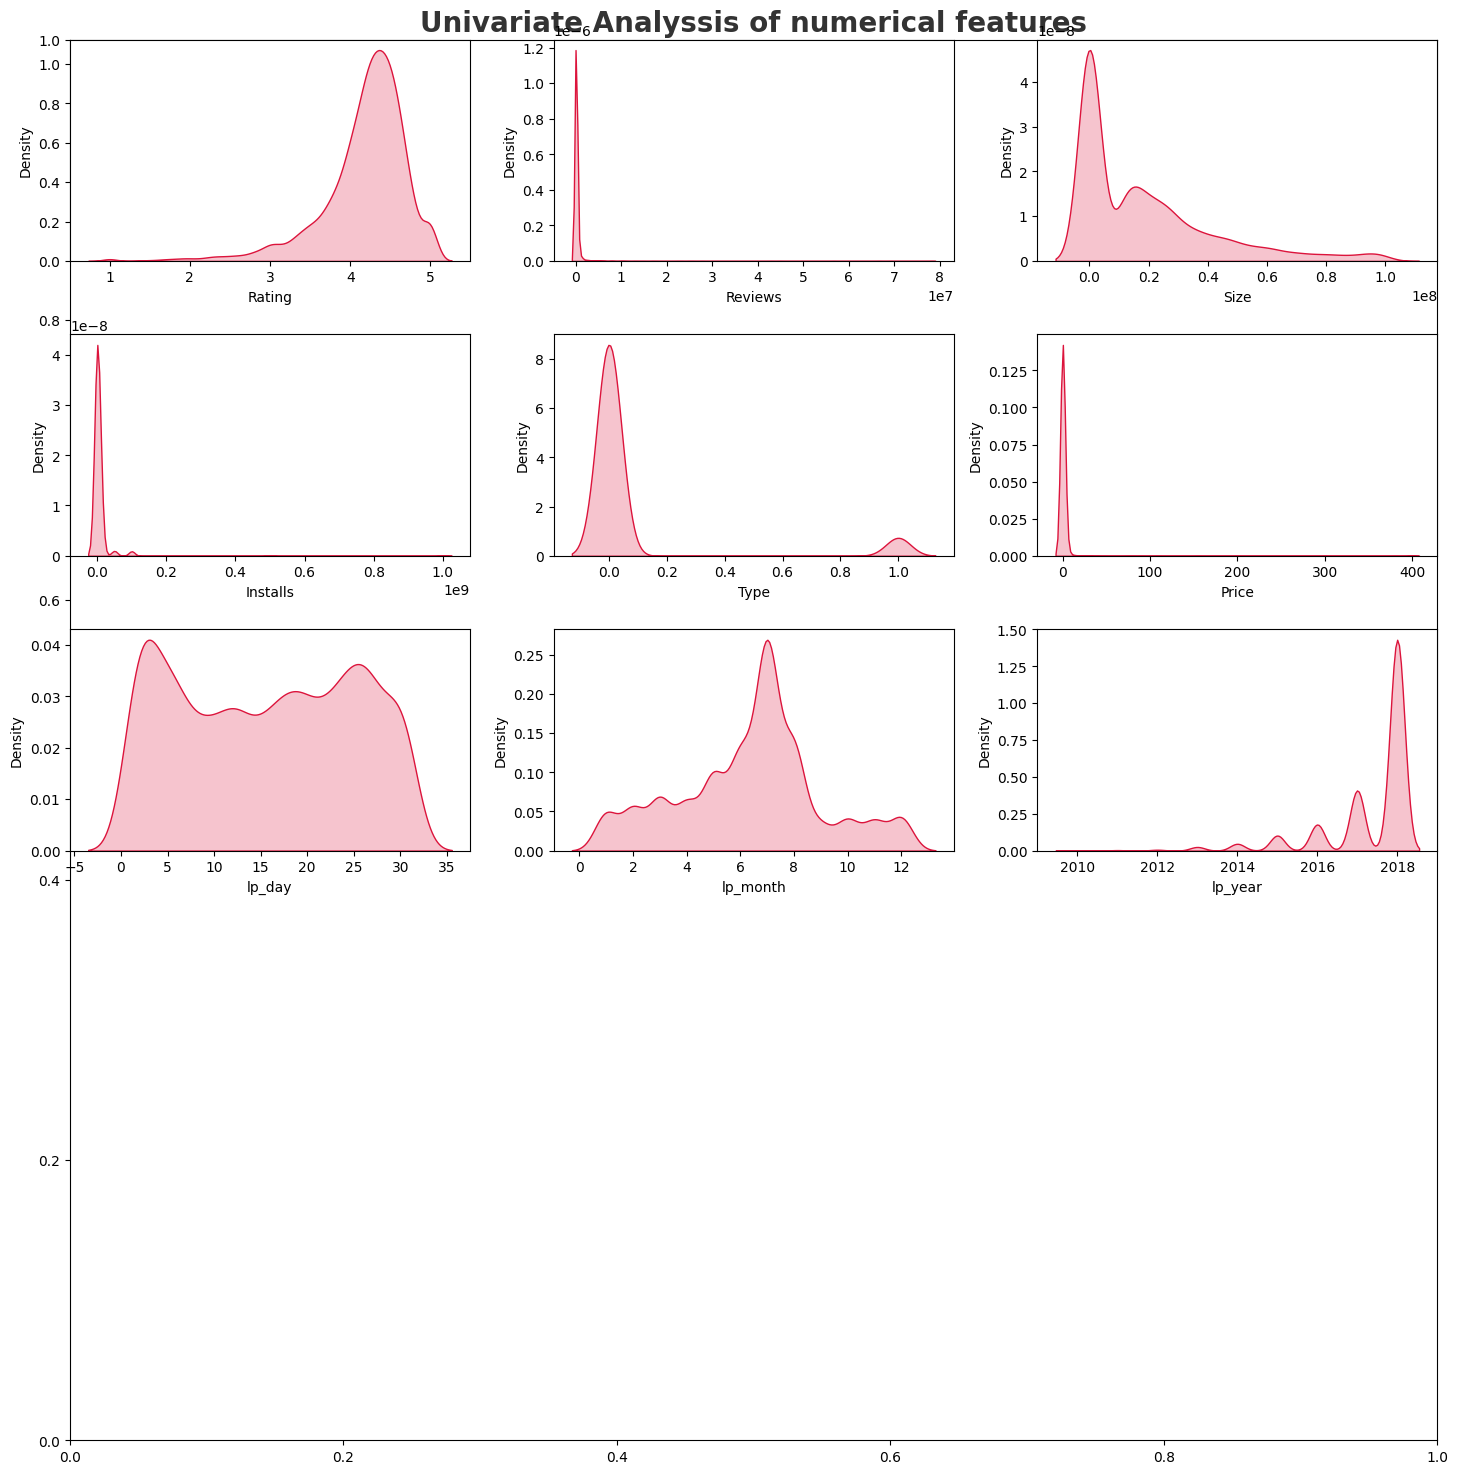

In [126]:
plt.figure(figsize=(15,15))
plt.title("Univariate Analyssis of numerical features",fontsize=20,fontweight="bold",alpha=0.8)
for i in range(0,len(numeric_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(
    x=df[numeric_features[i]],
    color="crimson",      # The color of the line and fill
    fill=True,            # Fills the area under the curve
  )
  plt.xlabel(numeric_features[i])
  plt.tight_layout()


In [ ]:
plt.figure(figsize=(20,15))
plt.title("Univariate Analyssis of categorical features",fontsize=20,fontweight="bold",alpha=0.8)
category=["Type","Content Rating"]
for i in range(0, len(category)):
  plt.subplot(2,2,i+1)


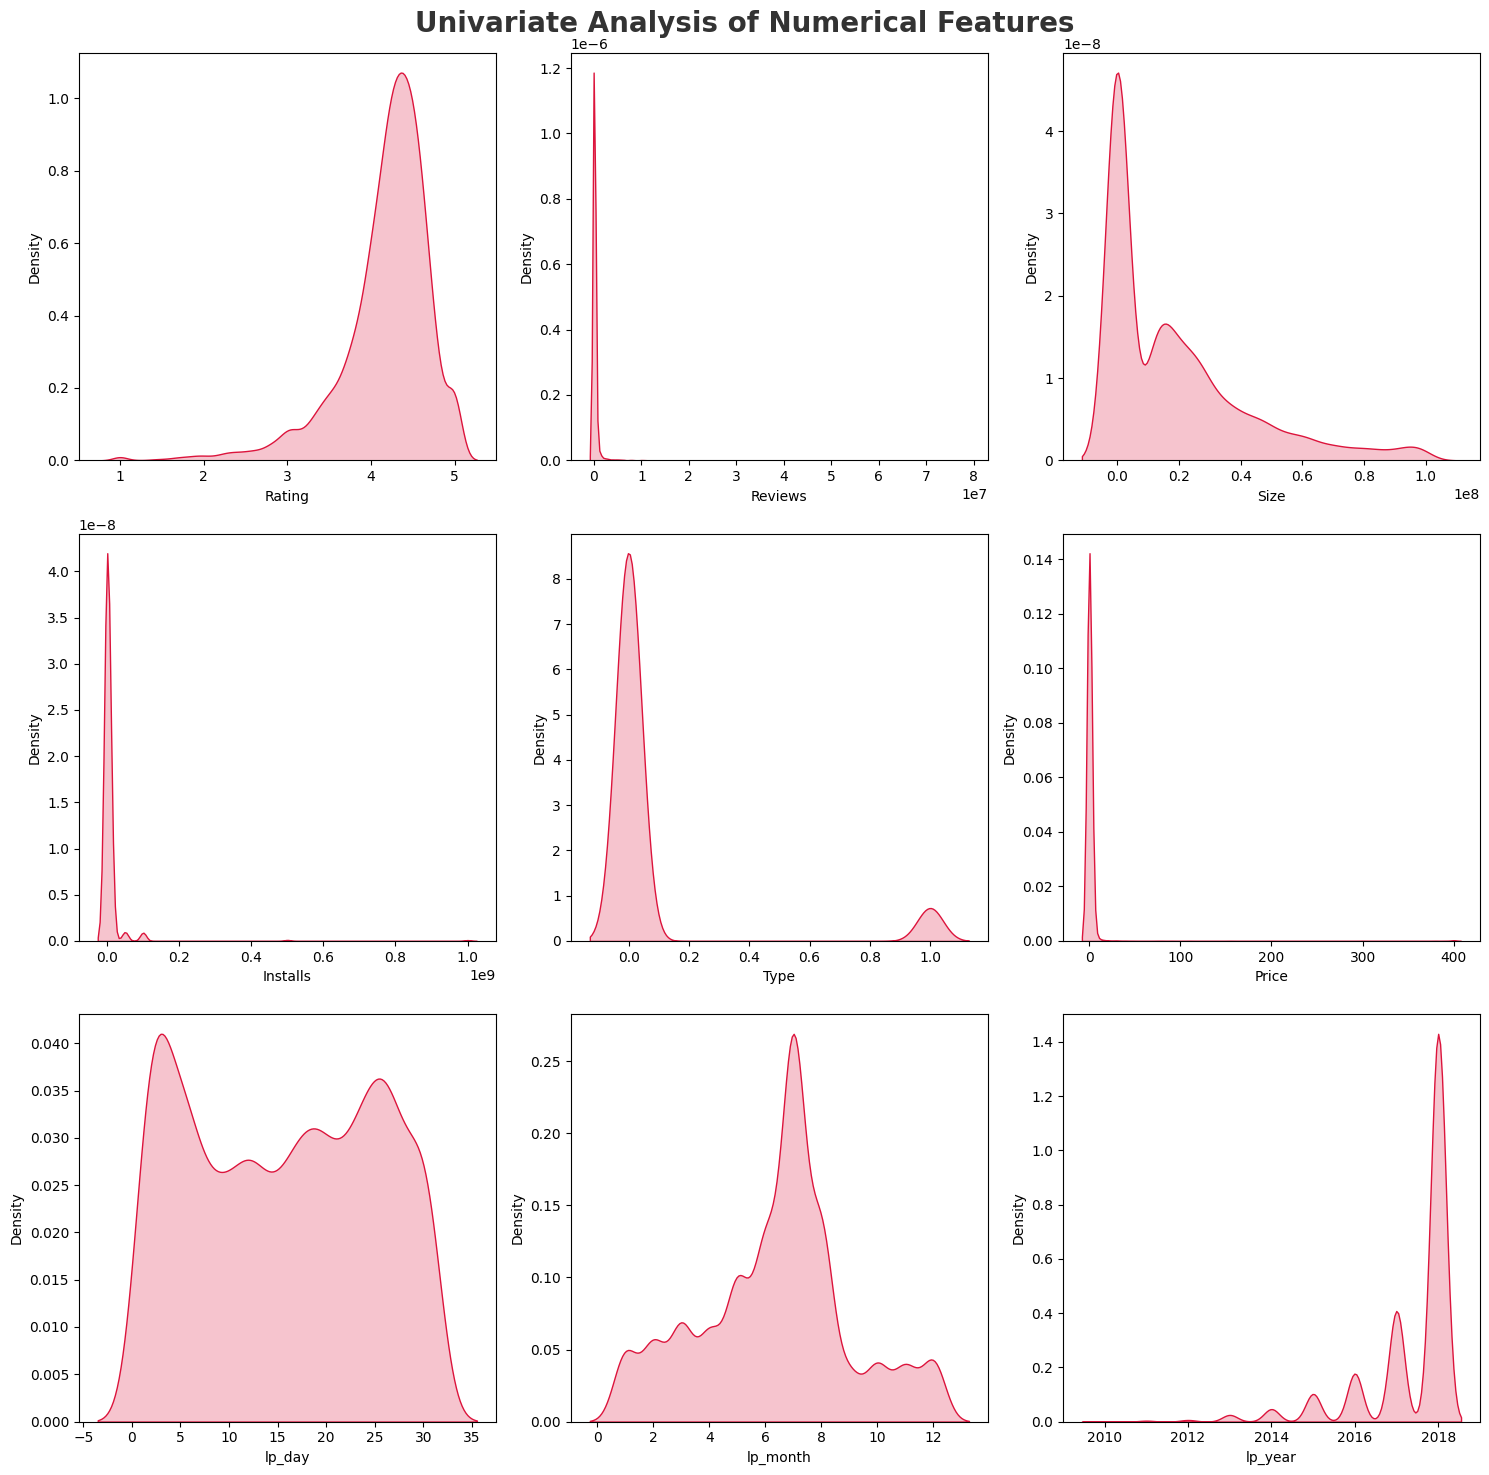

In [127]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Decide how many columns you want (e.g., 3 is usually good)
cols = 3

# 2. Calculate rows automatically
# If you have 5 features: 5 / 3 = 1.66 -> rounds up to 2 rows.
# If you have 7 features: 7 / 3 = 2.33 -> rounds up to 3 rows.
rows = math.ceil(len(numeric_features) / cols)

plt.figure(figsize=(15, 5 * rows)) # Adjust height based on rows
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8)

for i in range(len(numeric_features)):
    # Use the calculated rows and cols variables
    plt.subplot(rows, cols, i + 1)

    sns.kdeplot(
        x=df[numeric_features[i]],
        color="crimson",
        fill=True
    )
    plt.xlabel(numeric_features[i])

plt.tight_layout()
plt.show()

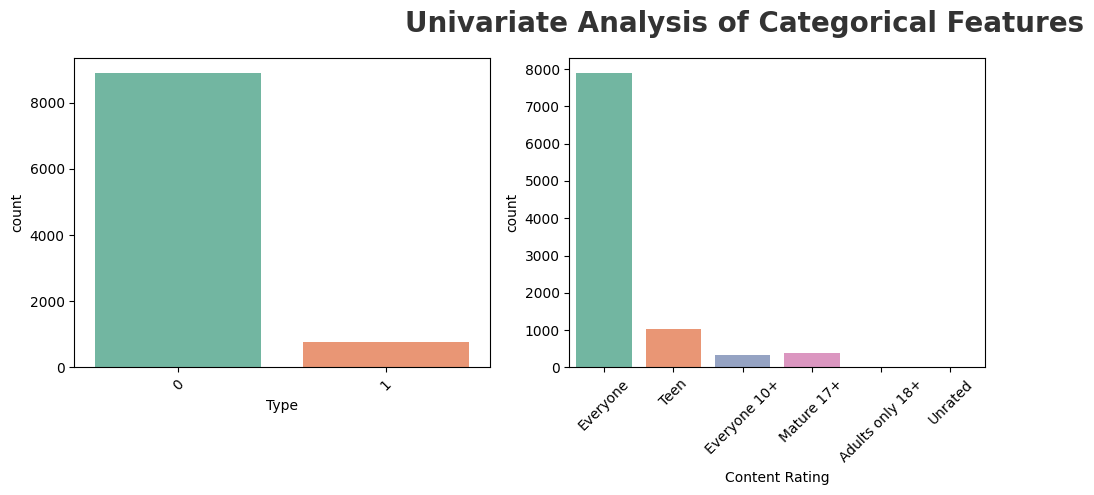

In [128]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols = 3
category = ["Type", "Content Rating"]
rows = math.ceil(len(category) / cols)

plt.figure(figsize=(15, 5 * rows))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8)

for i in range(len(category)):
    plt.subplot(rows, cols, i + 1)

    sns.countplot(
        x=df[category[i]],
        hue=df[category[i]],  # Explicitly link color to the category
        palette="Set2",
        legend=False          # No need for a legend here
    )

    plt.xlabel(category[i])
    plt.xticks(rotation=45)   # Rotates labels so they don't crash into each other

plt.tight_layout()
plt.show()

In [129]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,lp_day,lp_month,lp_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

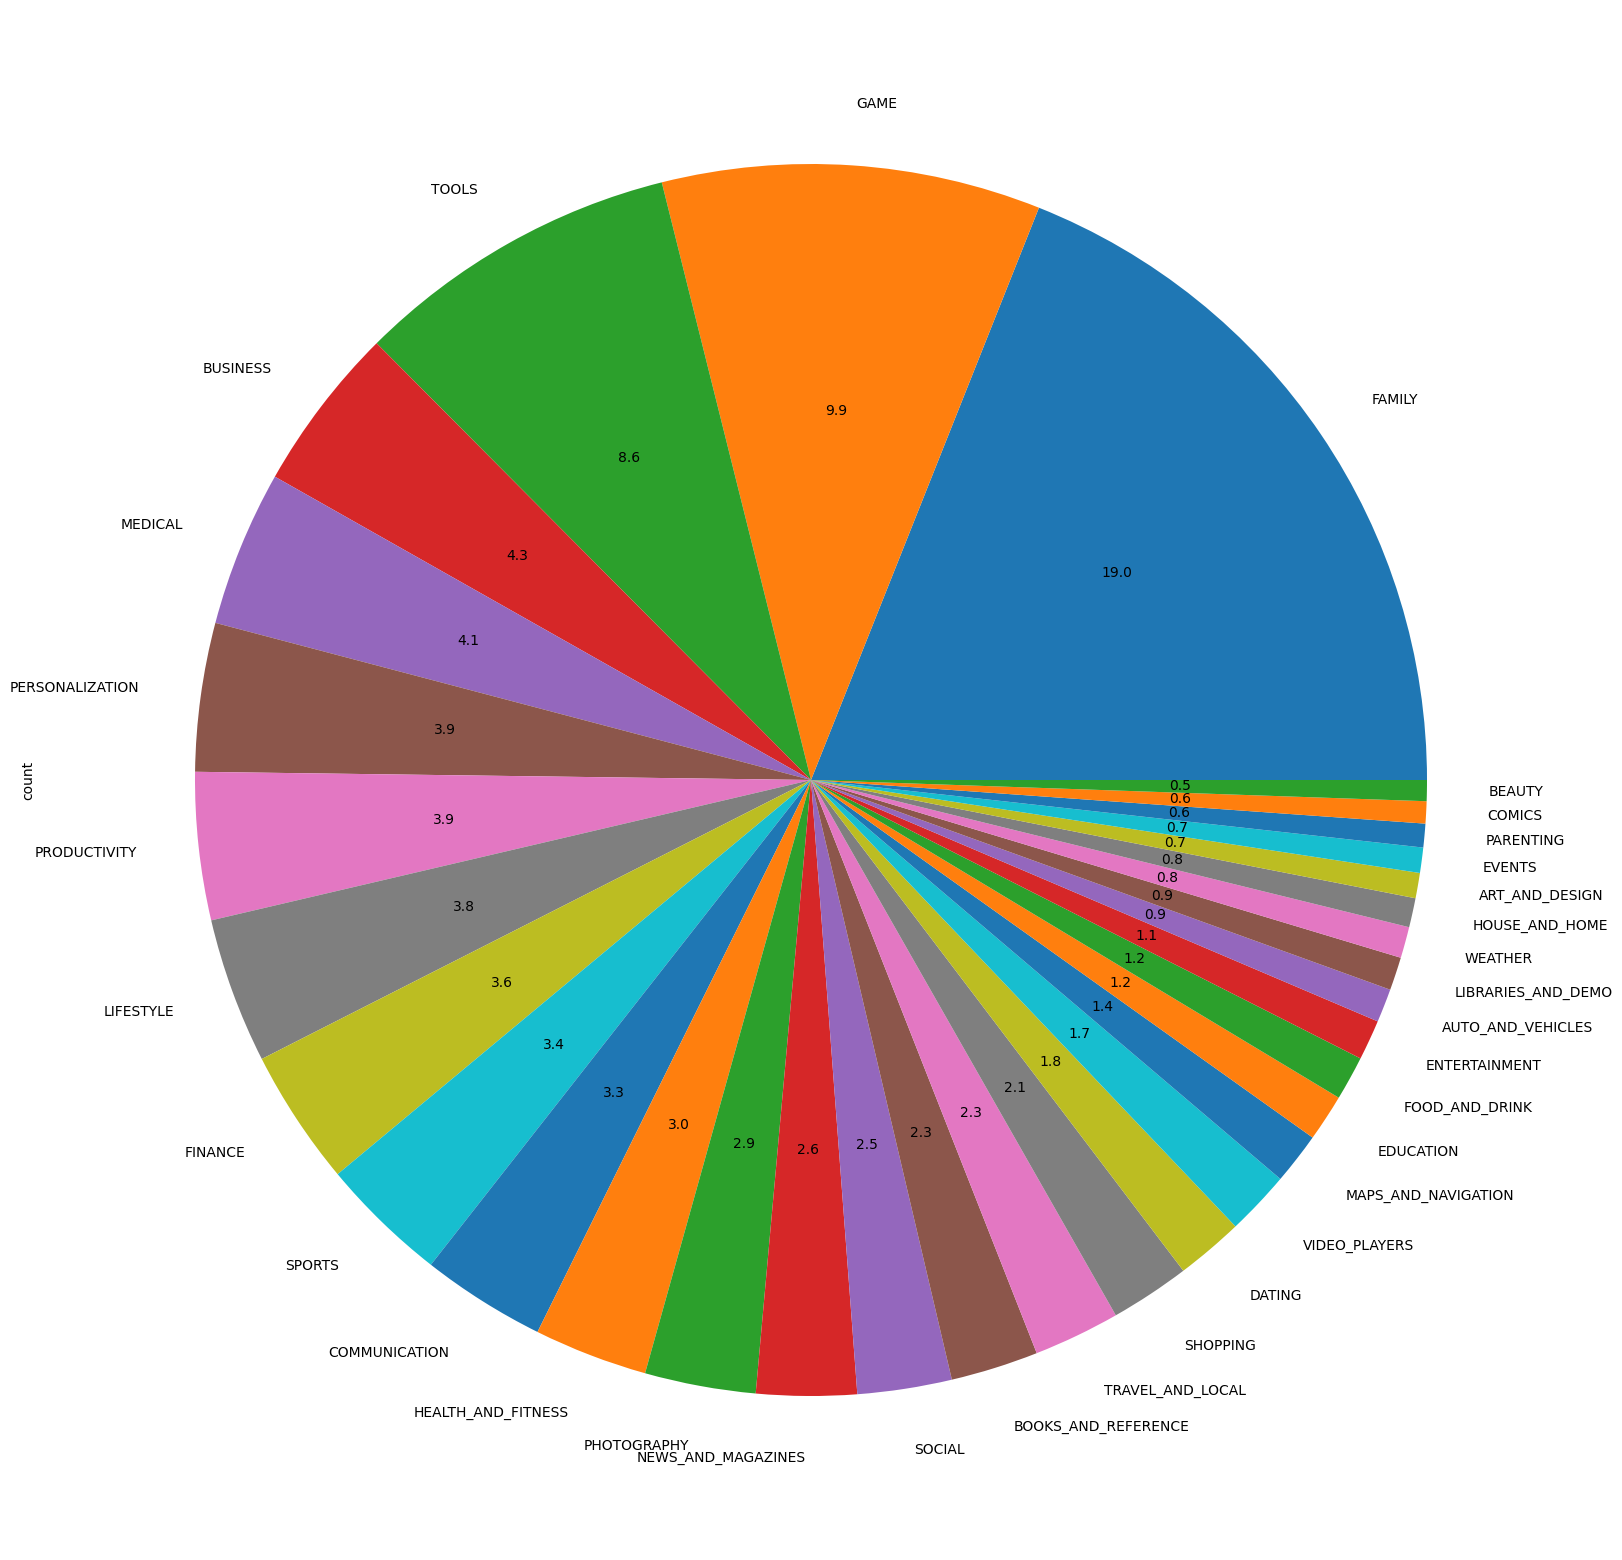

In [135]:
df["Category"].value_counts().plot(y=df["Category"],kind="pie",figsize=(20,20),autopct='%1.1f')

In [136]:
df["Category"].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [148]:
# Create a DataFrame and name the columns directly
category = df["Category"].value_counts().reset_index()
category.columns = ["Category", "Counts"]


print(category)

               Category  Counts
0                FAMILY    1832
1                  GAME     959
2                 TOOLS     827
3              BUSINESS     420
4               MEDICAL     395
5       PERSONALIZATION     376
6          PRODUCTIVITY     374
7             LIFESTYLE     369
8               FINANCE     345
9                SPORTS     325
10        COMMUNICATION     315
11   HEALTH_AND_FITNESS     288
12          PHOTOGRAPHY     281
13   NEWS_AND_MAGAZINES     254
14               SOCIAL     239
15  BOOKS_AND_REFERENCE     222
16     TRAVEL_AND_LOCAL     219
17             SHOPPING     202
18               DATING     171
19        VIDEO_PLAYERS     163
20  MAPS_AND_NAVIGATION     131
21            EDUCATION     119
22       FOOD_AND_DRINK     112
23        ENTERTAINMENT     102
24    AUTO_AND_VEHICLES      85
25   LIBRARIES_AND_DEMO      84
26              WEATHER      79
27       HOUSE_AND_HOME      74
28       ART_AND_DESIGN      64
29               EVENTS      64
30      

In [147]:
plt.figure(figsize=(15,5))
sns.barplot(x=category.index[:10],y="Counts",palette="hls",data=category[:10])
plt.title("Top 10 Application category")
plt.xticks(rotation=45)

NameError: name 'Category' is not defined

<Figure size 1500x500 with 0 Axes>

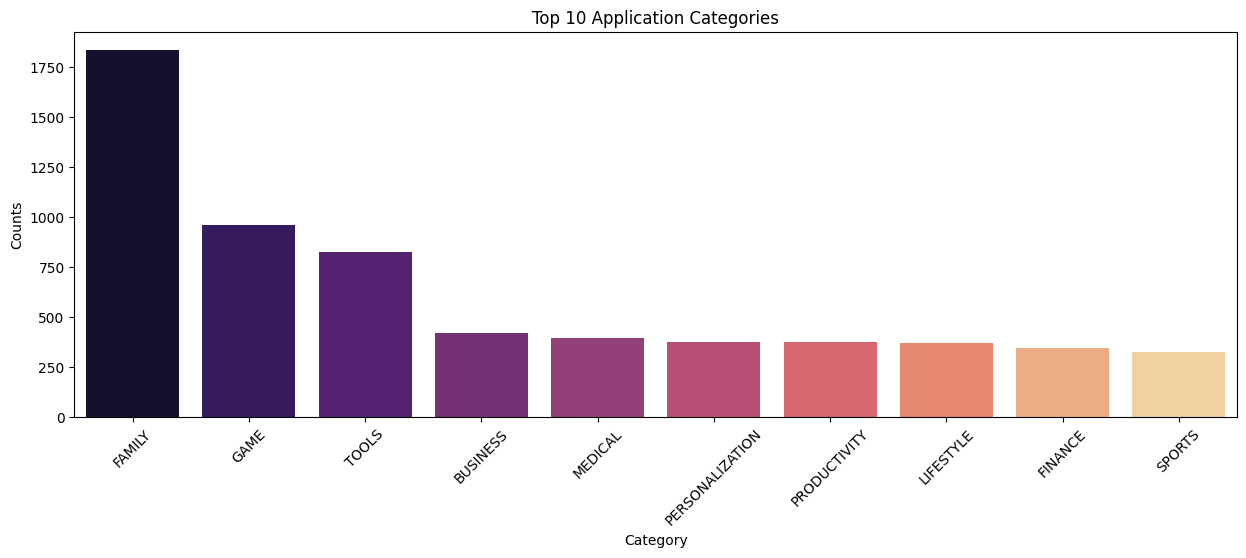

In [160]:
irline

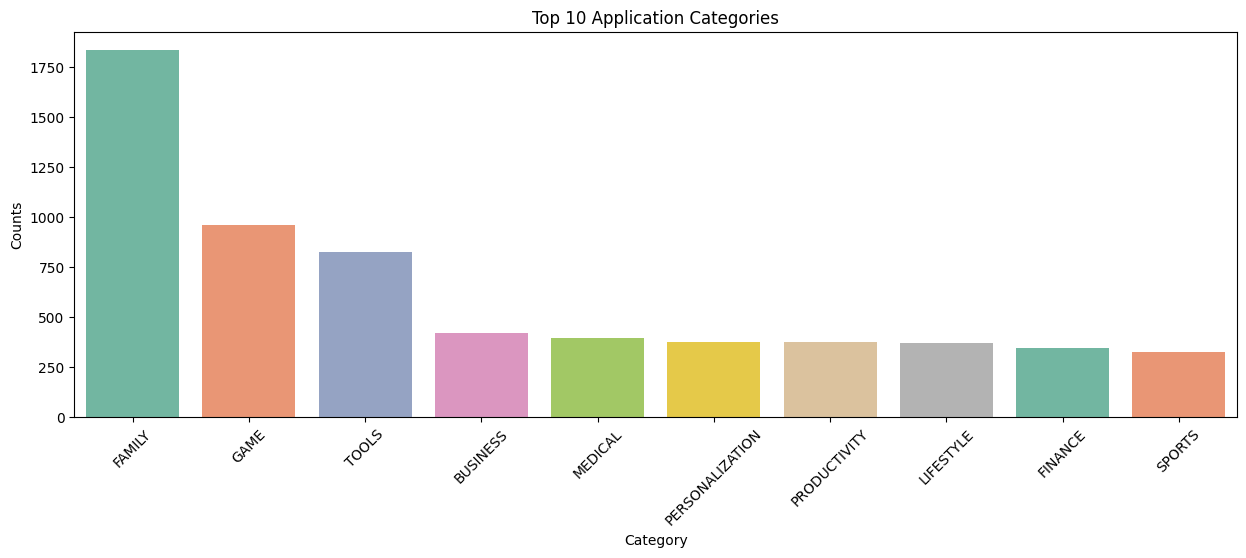

In [163]:
plt.figure(figsize=(15,5))

# 1. Slice the data first
top_10 = category.iloc[:10]

# 2. Map 'x' to the column name "Category", not the index
sns.barplot(
    x="Category",    # <--- Change this from category.index to the column name
    y="Counts",
    data=top_10,
    palette="Set2",
    hue="Category",  # Keeps colors consistent and fixes warnings
    legend=False
)

plt.title("Top 10 Application Categories")
plt.xticks(rotation=45)
plt.show()

In [116]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10838
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   int64  
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  lp_day          9659 non-null   int32  
 13  lp_month        9659 non-null   int32  
 14  lp_year         9659 non-null   int32  
dtypes: float64(3), int32(3), int64(3), object(6)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,lp_day,lp_month,lp_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
